# IMPORTING IBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# LOADING CSV 

In [2]:
df = pd.read_csv("D:\customer churn\customer_churn_dataset-testing-master.csv")

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\apoor\AppData\Local\Temp\ipykernel_15776\3722100661.py:1: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv("D:\customer churn\customer_churn_dataset-testing-master.csv")


# DATA PREPROCESSING

In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Age Group,High Support Falge,Payment delay flag
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1,<25,High,Delayed
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0,35-44,High,Delayed
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0,45-54,Low,Delayed
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0,35-44,High,Delayed
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0,45-54,High,Delayed


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          64374 non-null  int64 
 1   Age                 64374 non-null  int64 
 2   Gender              64374 non-null  object
 3   Tenure              64374 non-null  int64 
 4   Usage Frequency     64374 non-null  int64 
 5   Support Calls       64374 non-null  int64 
 6   Payment Delay       64374 non-null  int64 
 7   Subscription Type   64374 non-null  object
 8   Contract Length     64374 non-null  object
 9   Total Spend         64374 non-null  int64 
 10  Last Interaction    64374 non-null  int64 
 11  Churn               64374 non-null  int64 
 12  Age Group           64374 non-null  object
 13  High Support Falge  64374 non-null  object
 14  Payment delay flag  64374 non-null  object
dtypes: int64(9), object(6)
memory usage: 7.4+ MB


In [15]:
df.shape

(64374, 15)

In [6]:
df.isnull().sum()

CustomerID            0
Age                   0
Gender                0
Tenure                0
Usage Frequency       0
Support Calls         0
Payment Delay         0
Subscription Type     0
Contract Length       0
Total Spend           0
Last Interaction      0
Churn                 0
Age Group             0
High Support Falge    0
Payment delay flag    0
dtype: int64

In [26]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


# KPI'S

In [9]:
total_customers = df['CustomerID'].nunique()
churned_customers = df['Churn'].sum()
active_customers = total_customers - churned_customers
churn_rate = churned_customers / total_customers

avg_tenure = df['Tenure'].mean()
avg_support_calls = df['Support Calls'].mean()
avg_payment_delay = df['Payment Delay'].mean()

print("Total Customers:", total_customers)
print("Churn Rate:", round(churn_rate,2))
print("Active customers:",active_customers)
print("Churned Customers:",churned_customers)
print("Average Support calls:",round(avg_support_calls,2))
print("Average payment delay:",round(avg_payment_delay,2))

Total Customers: 64374
Churn Rate: 0.47
Active customers: 33881
Churned Customers: 30493
Average Support calls: 5.4
Average payment delay: 17.13


# EDA

### Churn by Contract length

In [10]:
df.groupby('Contract Length')['Churn'].mean().sort_values(ascending=False)


Contract Length
Monthly      0.516087
Annual       0.462167
Quarterly    0.440482
Name: Churn, dtype: float64

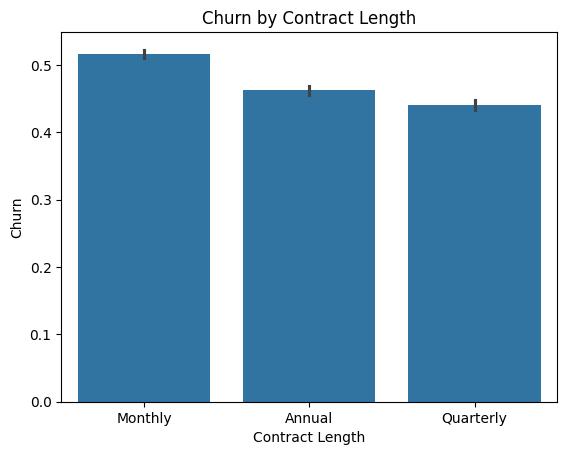

In [11]:
sns.barplot(x='Contract Length', y='Churn', data=df)
plt.title("Churn by Contract Length")
plt.show()

### Churn by subscription type

In [12]:
df.groupby('Subscription Type')['Churn'].mean()


Subscription Type
Basic       0.482775
Premium     0.464964
Standard    0.473305
Name: Churn, dtype: float64

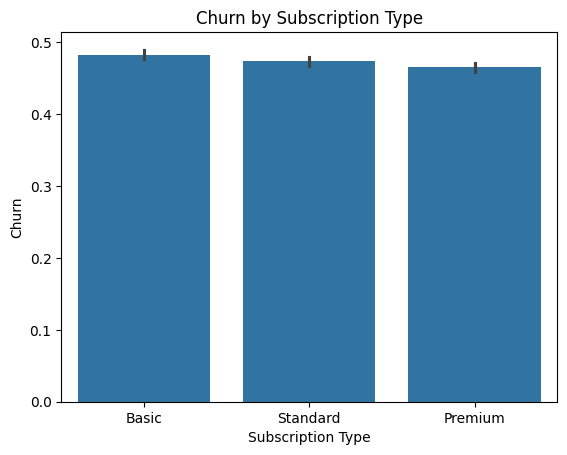

In [13]:
sns.barplot(x='Subscription Type', y='Churn', data=df)
plt.title("Churn by Subscription Type")
plt.show()


### Churn by age group

In [16]:
df.groupby('Age Group')['Churn'].mean()


Age Group
25-34    0.444538
35-44    0.444918
45-54    0.484017
55+      0.527253
<25      0.449694
Name: Churn, dtype: float64

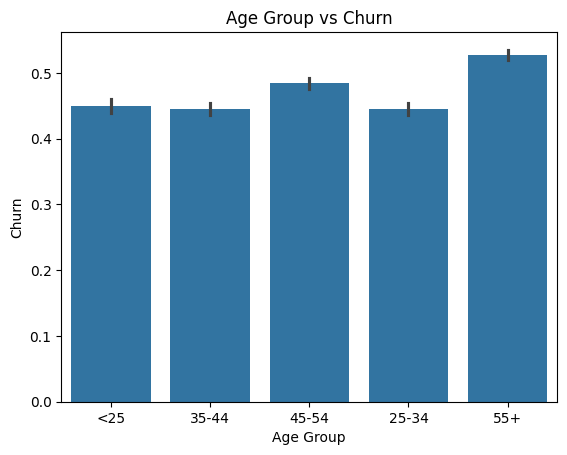

In [17]:
sns.barplot(x='Age Group', y='Churn', data=df)
plt.title("Age Group vs Churn")
plt.show()


### Support Calls vs Churn

In [18]:
df.groupby('Support Calls')['Churn'].mean()


Support Calls
0     0.242199
1     0.228850
2     0.231505
3     0.248359
4     0.318376
5     0.604627
6     0.606115
7     0.617821
8     0.609565
9     0.609094
10    0.606953
Name: Churn, dtype: float64

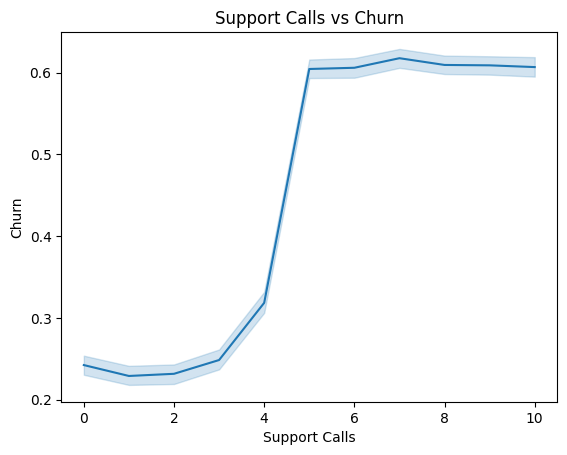

In [19]:
sns.lineplot(x='Support Calls', y='Churn', data=df)
plt.title("Support Calls vs Churn")
plt.show()


### Payment Delay vs Churn

In [ ]:
payment_churn = df.groupby('Payment Delay')['Churn'].mean().reset_index()


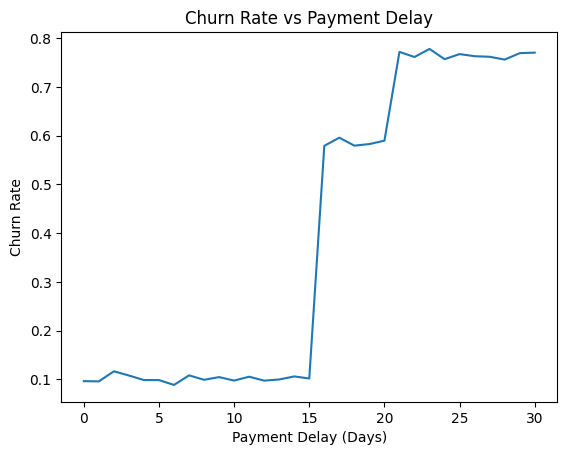

In [25]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(payment_churn['Payment Delay'], payment_churn['Churn'])
plt.title("Churn Rate vs Payment Delay")
plt.xlabel("Payment Delay (Days)")
plt.ylabel("Churn Rate")
plt.show()
